In [1]:
# Standard Data Science Helpers
import numpy as np
import pandas as pd
import scipy

import plotly.graph_objs as go
import plotly.graph_objects as go
import plotly.express as px

from ipywidgets import widgets

import chart_studio.plotly as py

from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)

# Extra options
pd.options.display.max_rows = 30
pd.options.display.max_columns = 25

# Show all code cells outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import os
from IPython.display import Image, display, HTML

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [2]:
nt_df = pd.read_csv('nt_crime_statistics_may_2022.csv')

# might use Southern Australia data for comparison
sa_df = pd.read_csv('2013-14-data_sa_crime.csv') 



In [3]:
nt_df.keys()

Index(['As At', 'Year', 'Month number', 'Offence category', 'Offence type',
       'Alcohol involvement', 'DV involvement', 'Reporting region ',
       'Statistical Area 2', 'Number of offences'],
      dtype='object')

In [4]:
nt_df.columns = [colname.strip() for colname in nt_df.columns]
nt_df.drop('As At', axis = 1)

,Year,Month number,Offence category,Offence type,Alcohol involvement,DV involvement,Reporting region,Statistical Area 2,Number of offences
0,2008,1,Abduction - harassment and other offences agai...,Deprivation of liberty /false imprisonment,-,-,Alice Springs,-,1
1,2008,1,Abduction - harassment and other offences agai...,Deprivation of liberty /false imprisonment,-,-,NT Balance,Alligator,1
2,2008,1,Abduction - harassment and other offences agai...,Deprivation of liberty /false imprisonment,-,-,Tennant Creek,-,1
3,2008,1,Abduction - harassment and other offences agai...,Harassment and private nuisance,-,-,NT Balance,Alligator,2
4,2008,1,Abduction - harassment and other offences agai...,Harassment and private nuisance,-,-,NT Balance,Daly,1
...,...,...,...,...,...,...,...,...,...
44989,2022,5,Theft and related offences (other than MV),Theft and related offences (other than MV),-,-,NT Balance,Weddell,5
44990,2022,5,Theft and related offences (other than MV),Theft and related offences (other than MV),-,-,NT Balance,West Arnhem,8
44991,2022,5,Theft and related offences (other than MV),Theft and related offences (other than MV),-,-,NT Balance,Yuendumu - Anmatjere,8
44992,2022,5,Theft and related offences (other than MV),Theft and related offences (other than MV),-,-,Palmerston,-,70


In [5]:
nt_df.shape

(44994, 10)

In [6]:
region_year_offences_df = pd.DataFrame(nt_df.groupby(['Reporting region', 'Year'])['Number of offences'].sum().reset_index())
region_year_offences_df

,Reporting region,Year,Number of offences
0,Alice Springs,2008,5312
1,Alice Springs,2009,5735
2,Alice Springs,2010,6989
3,Alice Springs,2011,6235
4,Alice Springs,2012,7418
...,...,...,...
100,Tennant Creek,2018,1107
101,Tennant Creek,2019,1344
102,Tennant Creek,2020,1277
103,Tennant Creek,2021,1451


In [7]:
region_month_year_df = pd.DataFrame(nt_df.groupby(['Reporting region', 'Year', 'Month number'])['Number of offences'].sum().reset_index())
region_month_year_df

,Reporting region,Year,Month number,Number of offences
0,Alice Springs,2008,1,420
1,Alice Springs,2008,2,358
2,Alice Springs,2008,3,508
3,Alice Springs,2008,4,487
4,Alice Springs,2008,5,406
...,...,...,...,...
1206,Tennant Creek,2022,1,63
1207,Tennant Creek,2022,2,79
1208,Tennant Creek,2022,3,126
1209,Tennant Creek,2022,4,119


In [8]:
region_month_year_offence_category = pd.DataFrame(nt_df.groupby(['Reporting region', 'Year', 'Month number', 'Offence category', 'Offence type'])['Number of offences'].sum().reset_index())
region_month_year_offence_category

,Reporting region,Year,Month number,Offence category,Offence type,Number of offences
0,Alice Springs,2008,1,Abduction - harassment and other offences agai...,Deprivation of liberty /false imprisonment,1
1,Alice Springs,2008,1,Abduction - harassment and other offences agai...,Threatening behaviour,4
2,Alice Springs,2008,1,Acts intended to cause injury,Assault,95
3,Alice Springs,2008,1,Commercial break-ins,Commercial break-ins actual,31
4,Alice Springs,2008,1,Commercial break-ins,Commercial break-ins attempted,1
...,...,...,...,...,...,...
14752,Tennant Creek,2022,5,Motor theft and related offences,Illegal use of a motor vehicle,1
14753,Tennant Creek,2022,5,Motor theft and related offences,Theft of motor vehicle parts or contents,2
14754,Tennant Creek,2022,5,Other Dangerous or negligent acts endangering ...,Other dangerous or negligent acts endangering ...,2
14755,Tennant Creek,2022,5,Property Damage Offences,Property damage offences,35


In [9]:
region_month_year_offence_category['Reporting region'].unique()

array(['Alice Springs', 'Darwin', 'Katherine', 'NT Balance', 'Nhulunbuy',
       'Palmerston', 'Tennant Creek'], dtype=object)

In [10]:
nt_df['Statistical Area 2'].unique()

array(['-', 'Alligator', 'Daly', 'Barkly', 'Victoria River',
       'Yuendumu - Anmatjere', 'East Arnhem', 'Elsey', 'Gulf',
       'Humpty Doo', 'Sandover - Plenty', 'Anindilyakwa',
       'Petermann - Simpson', 'Tanami', 'Thamarrurr', 'Tiwi Islands',
       'Weddell', 'West Arnhem', 'Howard Springs', 'Virginia', 'Unknown'],
      dtype=object)

In [11]:
region_population_unemployment = region_month_year_offence_category.drop(['Year', 'Month number', 'Offence category', 'Offence type'], axis = 1)

In [13]:
region_population_unemployment_df = pd.DataFrame(region_population_unemployment.groupby('Reporting region').sum())

In [16]:
region_population_unemployment_df = region_population_unemployment_df.reset_index()

In [18]:
region_population_unemployment_df.keys()

Index(['Reporting region', 'Number of offences'], dtype='object')

In [19]:
region_population_unemployment_df

,Reporting region,Number of offences
0,Alice Springs,94639
1,Darwin,145595
2,Katherine,24768
3,NT Balance,87229
4,Nhulunbuy,5295
5,Palmerston,47344
6,Tennant Creek,15671


In [20]:
population = []
for region in region_population_unemployment_df['Reporting region']:
    if(region == 'Alice Springs'):
        population.append(23736)
    elif(region == 'Darwin'):
        population.append(132045)
    elif(region == 'Katherine'):
        population.append(9717)
    elif(region == 'NT Balance'):
        population.append(4576)    
    elif(region == 'Nhulunbuy'):
        population.append(3240)
    elif(region == 'Palmerston'):
        population.append(29346)
    elif(region == 'Tennant Creek'):
        population.append(2991)

In [21]:
population

[23736, 132045, 9717, 4576, 3240, 29346, 2991]

In [22]:
unemployed = []
for region in region_population_unemployment_df['Reporting region']:
    if(region == 'Alice Springs'):
        unemployed.append(430)
    elif(region == 'Darwin'):
        unemployed.append(3466)
    elif(region == 'Katherine'):
        unemployed.append(162)
    elif(region == 'NT Balance'):
        unemployed.append(4153)
    elif(region == 'Nhulunbuy'):
        unemployed.append(52)
    elif(region == 'Palmerston'):
        unemployed.append(922)
    elif(region == 'Tennant Creek'):
        unemployed.append(89)

In [23]:
unemployed

[430, 3466, 162, 4153, 52, 922, 89]

In [27]:
pop_unemp = pd.DataFrame({'population': population, 'unemployed': unemployed})

In [28]:
pop_unemp

,population,unemployed
0,23736,430
1,132045,3466
2,9717,162
3,4576,4153
4,3240,52
5,29346,922
6,2991,89


In [29]:
region_population_unemployment_df = pd.concat([region_population_unemployment_df, pop_unemp], axis = 1)

In [30]:
region_population_unemployment_df

,Reporting region,Number of offences,population,unemployed
0,Alice Springs,94639,23736,430
1,Darwin,145595,132045,3466
2,Katherine,24768,9717,162
3,NT Balance,87229,4576,4153
4,Nhulunbuy,5295,3240,52
5,Palmerston,47344,29346,922
6,Tennant Creek,15671,2991,89


In [33]:
offence_category_type = pd.DataFrame(nt_df.groupby(['Offence category','Offence type'])['Number of offences'].sum()).reset_index()
offence_category_type

,Offence category,Offence type,Number of offences
0,Abduction - harassment and other offences agai...,Abduction and kidnapping,15
1,Abduction - harassment and other offences agai...,Deprivation of liberty /false imprisonment,610
2,Abduction - harassment and other offences agai...,Harassment and private nuisance,1088
3,Abduction - harassment and other offences agai...,Threatening behaviour,3314
4,Acts intended to cause injury,Assault,102368
5,Acts intended to cause injury,Other acts intended to cause injury,371
6,Commercial break-ins,Commercial break-ins actual,26171
7,Commercial break-ins,Commercial break-ins attempted,3429
8,Homicide and related Offences,Attempted Murder,45
9,Homicide and related Offences,Driving causing death,37


In [34]:
offence_category = pd.DataFrame(nt_df.groupby('Offence category')['Number of offences'].sum()).reset_index()
offence_category

,Offence category,Number of offences
0,Abduction - harassment and other offences agai...,5027
1,Acts intended to cause injury,102739
2,Commercial break-ins,29600
3,Homicide and related Offences,248
4,House break-ins,29496
5,Motor theft and related offences,29486
6,Other Dangerous or negligent acts endangering ...,1787
7,Property Damage Offences,108292
8,Robbery - extortion and related offences,1809
9,Sexual Assault and related offences,6248


In [35]:
#  Get longitude and latitude and concat / join 

In [36]:
nt_df[nt_df['Year'] == 2013].describe()

,Year,Month number,Number of offences
count,3103.0,3103.000000,3103.000000
mean,2013.0,6.422172,8.638737
std,0.0,3.472883,23.206805
min,2013.0,1.000000,1.000000
25%,2013.0,3.000000,1.000000
50%,2013.0,6.000000,2.000000
75%,2013.0,9.000000,6.000000
max,2013.0,12.000000,304.000000


[Current - Northern Territory Crime Statistics May 2022](https://data.nt.gov.au/dataset/current-northern-territory-crime-statistics-may-2022)

[South Australian Government Data Directory](https://data.sa.gov.au/data/dataset/crime-statistics)

[Australian Bureau of Statistics](https://www.abs.gov.au/census/find-census-data/search-by-area)

Offences in the Northern Territory can show strong seasonal patterns, with predictable peaks and troughs at certain times of the year.  Therefore, comparisons should be made of the same months in different years, rather than consecutive months.  For trends, a 12-month rolling average or rolling sum is recommended in order to dampen the month-to-month variability and account for the seasonal cycles.

Last update was July 1st 2022.

In 2017, the governments of the UK, Germany and Canada issued travel advisories to their citizens travelling in Australia, singling out Alice Springs as a place where extra precautions should be taken: "Take care in the town centre of Alice Springs at night. There have been a number of incidents of harassment, robberies and attacks (including sexual assault) on foreign tourists." (UK).

"Foreign travellers warned about visiting Alice Springs". The New Daily. 15 March 2017. Retrieved 9 October 2019.

Webb, Carolyn (15 March 2017). "Foreign tourists warned on Alice Springs safety risks". The Sydney Morning Herald. Retrieved 9 October 2019.

"The Northern Territory is the Murder Capital of Australia." The Guardian. 18 June 2013.   https://www.theguardian.com/news/datablog/2013/jun/18/australia-new-crime-statistics. Retrieved 15 August 2021 

![Murder Capital of Australia](murder_capital.png)

Australia's Northern Territory has acquired quite a reputation due to *its consistently higher per capita rate for homicide and manslaughter than other Australian states and territories, as well as a high level of assaults.* ([Wikipedia](https://en.wikipedia.org/wiki/Crime_in_the_Northern_Territory)) Most of these were related to domestic violence and alcohol intake. 

The headline presented above came from an article which was written for the [Guardian](https://www.theguardian.com/news/datablog/2013/jun/18/australia-new-crime-statistics) by Nick Evershed on the 18th of June in 2013. He wrote that the Northern Territory's murder and assault rates are the highest in the country. 

The aim of this exploratory data analysis is to look into the crime trends in Australia's Northern territory using the Pandas and Plotly. The dataset used was the most recently updated [Current - Northern Territory Crime Statistics May 2022](https://data.nt.gov.au/dataset/current-northern-territory-crime-statistics-may-2022) from the Northern Territory Government website.

<h2 style = 'color: blue'> Reported Offences in the Northern Territory </h2>

In [37]:
@interact
def show_category_trend_by_region (By_Region = True,
                                   Region = list(region_month_year_offence_category['Reporting region'].unique()), 
                                   By_Year = False,
                                   Year = list(region_month_year_offence_category['Year'].unique()),
                                   By_Month = False,
                                   Month_Number = list(region_month_year_offence_category['Month number'].unique())):
    
    region_filter = region_month_year_offence_category['Reporting region'] == Region
    year_filter = region_month_year_offence_category['Year'] == Year
    month_filter = region_month_year_offence_category['Month number'] == Month_Number
    
    if By_Region:
        if By_Month & By_Year:
            region_month_year_offence_category[region_filter & year_filter & month_filter].iplot(kind = 'pie', values = 'Number of offences', labels = 'Offence category', title=f'Reported Offences in Month {Month_Number} of {Year} in {Region}')
        elif By_Year and not By_Month:
            region_month_year_offence_category[region_filter & year_filter].iplot(kind = 'pie', values = 'Number of offences', labels = 'Offence category', title=f'Reported Offences in {Year} in {Region}')    
        elif By_Month and not By_Year:
            region_month_year_offence_category[region_filter & month_filter].iplot(kind = 'pie', values = 'Number of offences', labels = 'Offence category', title=f'Reported Offences in Month {Month_Number} from 2008 to 2022 in {Region}')
        else:
            region_month_year_offence_category[region_filter].iplot(kind = 'pie', values = 'Number of offences', labels = 'Offence category', title=f'Reported Offences from 2008 to 2022 in {Region}')
    else:
        if By_Month & By_Year:
            region_month_year_offence_category[year_filter & month_filter].iplot(kind = 'pie', values = 'Number of offences', labels = 'Offence category', title=f'Reported Offences in Month {Month_Number} of {Year}')
        elif By_Year and not By_Month:
            region_month_year_offence_category[year_filter].iplot(kind = 'pie', values = 'Number of offences', labels = 'Offence category', title=f'Reported Offences in {Year}')    
        elif By_Month and not By_Year:
            region_month_year_offence_category[month_filter].iplot(kind = 'pie', values = 'Number of offences', labels = 'Offence category', title=f'Reported Offences in Month {Month_Number} from 2008 to 2022')
        else:
            region_month_year_offence_category.iplot(kind = 'pie', values = 'Number of offences', labels = 'Offence category', title=f'Reported Offences from 2008 to 2022')


interactive(children=(Checkbox(value=True, description='By_Region'), Dropdown(description='Region', options=('…

In [38]:
@interact
def show_offence_type(Category = list(region_month_year_offence_category['Offence category'].unique()),
                      By_Year = False,
                      Year = list(region_month_year_offence_category['Year'].unique()),
                      By_Month = False,
                      Month_Number = list(region_month_year_offence_category['Month number'].unique())):
    
    category_filter = region_month_year_offence_category['Offence category'] == Category
    year_filter = region_month_year_offence_category['Year'] == Year
    month_filter = region_month_year_offence_category['Month number'] == Month_Number
    
    
    if By_Month & By_Year:
        region_month_year_offence_category[category_filter & year_filter & month_filter].iplot(kind = 'pie', values = 'Number of offences', labels = 'Offence type', title=f'Types of Reported {Category} in Month {Month_Number} of {Year}')
    elif By_Year and not By_Month:
        region_month_year_offence_category[category_filter & year_filter].iplot(kind = 'pie', values = 'Number of offences', labels = 'Offence type', title=f'Types of Reported {Category} in {Year}')    
    elif By_Month and not By_Year:
        region_month_year_offence_category[category_filter & month_filter].iplot(kind = 'pie', values = 'Number of offences', labels = 'Offence type', title=f'Types of Reported {Category} in Month {Month_Number} from 2008 to 2022')
    else:
        region_month_year_offence_category[category_filter].iplot(kind = 'pie', values = 'Number of offences', labels = 'Offence type', title=f'Types of Reported {Category} from 2008 to 2022')


interactive(children=(Dropdown(description='Category', options=('Abduction - harassment and other offences aga…

> ### The top 3 reported offences in the Northern Territory from 2008 to 2022 are: 
>
> - Property Damage Offences: 25.8%
> - Theft and Related Offences (other than Motor Vehicle Theft): 25.2%
> - Acts intended to cause injury: 24.4%
>

Homicide and related offences only make up 0.059% of the reported offences. With a total of 44,994 reported offences, this means that 248 incidences of homicide occurred in a span of 13.5 years, which can indicate that an average of 18 homicides are reported each year. 

> ### The offence categories are subdivided into different types.
>
> - Looking at the different types of offences associated with homicide, it is interesting to see that from 2008 to 2022, only 48.8% was classified as murder, which means that only half of the homicide offences, were intentional. 

 - 18.1% of the homicide offences fall under manslaughter, which means that it was not intentional. This mean that around 45 out of 248 incidents could be related to violence due to alcohol or negligent behaviour. 

 - Considering that acts intended to cause injury and dangerous, negligent acts that endanger persons, abduction, and sexual assault make up more than a quarter of the reported offences, it is highly possible for these acts to lead to manslaughter.

 - Theft and break-ins, which make up half of the reported incidents, can also lead to manslaughter should struggles between the victim and thief occur. 

 - 14.9% of the homicide cases were due to driving accidents (which can easily be caused by alcohol and negligent behaviour.)

 - Lastly, 18.1% of the cases reported were classified as attempted murder, which should mean that the victim did not die from it. 

In [39]:
nt_df['Number of offences'].describe()

count    44994.000000
mean         9.346602
std         26.984379
min          1.000000
25%          1.000000
50%          3.000000
75%          6.000000
max        458.000000
Name: Number of offences, dtype: float64

In [40]:
nt_df[nt_df['Number of offences'] == 458]

,As At,Year,Month number,Offence category,Offence type,Alcohol involvement,DV involvement,Reporting region,Statistical Area 2,Number of offences
6111,1/07/2022,2010,1,Property Damage Offences,Property damage offences,-,-,Darwin,-,458


In [41]:
@interact
def show_max_min_offence(Category = list(region_month_year_offence_category['Offence category'].unique())):
    print(region_month_year_offence_category[region_month_year_offence_category['Offence category'] == Category]['Number of offences'].describe())

interactive(children=(Dropdown(description='Category', options=('Abduction - harassment and other offences aga…

<h2 style = 'color: blue'> Regional Trend </h2>

> *In 2017, the governments of the UK, Germany and Canada issued travel advisories to their citizens travelling in Australia, singling out Alice Springs as a place where extra precautions should be taken: "Take care in the town centre of Alice Springs at night. There have been a number of incidents of harassment, robberies and attacks (including sexual assault) on foreign tourists." (UK).*
>
> -- "Foreign travellers warned about visiting Alice Springs". The New Daily. 15 March 2017. Retrieved 9 October 2019.


In [42]:
px.line(region_year_offences_df, x = 'Year', y = 'Number of offences', color = 'Reporting region', markers = True)

In [43]:
@interact
def show_offences_percentage_reporting_region(Category = list(region_month_year_offence_category['Offence category'].unique())):
    region_month_year_offence_category[region_month_year_offence_category['Offence category'] == Category].iplot(kind = 'pie', 
                                                                                                               values = 'Number of offences',
                                                                                                                labels = 'Reporting region',
                                                                                                                title = f'{Category} in NT Regions From 2008 to 2022')

interactive(children=(Dropdown(description='Category', options=('Abduction - harassment and other offences aga…

In [44]:
@interact
def show_offences_per_reporting_region(Region = list(region_month_year_offence_category['Reporting region'].unique())):
    region_month_year_offence_category[region_month_year_offence_category['Reporting region'] == Region].groupby('Offence category')['Number of offences'].sum().iplot(kind = 'barh',
                                                                                                             xTitle = 'Month', 
                                                                                                             yTitle = 'Number of Offences',
                                                                                                             title = f'Number of Offences in {Region} from 2008 - 2022')

interactive(children=(Dropdown(description='Region', options=('Alice Springs', 'Darwin', 'Katherine', 'NT Bala…

In [45]:
px.scatter(region_population_unemployment_df, x = 'unemployed', y = 'Number of offences', size = 'population', color = 'Reporting region', title = 'Population vs Unemployment vs Number of Offenses' )

<h2 style = 'color: blue'> Yearly Trend </h2>

According to the source of the data, [Current - Northern Territory Crime Statistics May 2022](https://data.nt.gov.au/dataset/current-northern-territory-crime-statistics-may-2022), the *offences in the Northern Territory can show **strong seasonal patterns, with predictable peaks and troughs at certain times of the year.**  Therefore, comparisons should be made of the same months in different years, rather than consecutive months.  For trends, a 12-month rolling average or rolling sum is recommended in order to dampen the month-to-month variability and account for the seasonal cycles.*

In [46]:
@interact
def show_yearly_crime_count(Year=(2008, 2022, 1)):
    
    monthly_sum = nt_df[nt_df['Year']==Year].groupby('Month number')['Number of offences'].sum()
    yearly_mean = nt_df[nt_df['Year']==Year].groupby('Month number')['Number of offences'].sum().mean()
    monthly_variance = monthly_sum - yearly_mean
    maximum_sum = nt_df[nt_df['Year']==Year].groupby('Month number')['Number of offences'].sum().max()
    minimum_sum = nt_df[nt_df['Year']==Year].groupby('Month number')['Number of offences'].sum().min()
    years = nt_df['Year'].unique
    
    yearly_count = pd.DataFrame(monthly_sum)
    yearly_count['Mean'] = yearly_mean
    yearly_count['Variance'] = monthly_variance 
    yearly_count['Percent Variance'] = monthly_variance / yearly_mean * 100
    
    yearly_max_min = pd.DataFrame([maximum_sum, minimum_sum])
    
    if len(yearly_count.index) > 5:
        yearly_count.index = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
    else:
        yearly_count.index = ['Jan', 'Feb', 'March', 'April', 'May']
                 

    yearly_count.iplot(kind='bar',
                       barmode='group', 
                       title=f'Number of Offences, Mean & Variance For Each Month in {Year}'
                      )
    
    display(yearly_count)
    

interactive(children=(IntSlider(value=2015, description='Year', max=2022, min=2008), Output()), _dom_classes=(…

In [47]:
@interact
def show_monthly_crime_count(Month=[('January', 1), ('February', 2), ('March', 3), ('April', 4), ('May', 5), ('June', 6), ('July', 7), ('August', 8), ('September', 9), ('October', 10), ('November', 11), ('December', 12)]):
    

    monthly_sum_per_year = nt_df[nt_df['Month number'] == Month].groupby('Year')['Number of offences'].sum()
    mean_by_month = nt_df[nt_df['Month number'] == Month].groupby('Year')['Number of offences'].sum().mean()
    variance_by_month = monthly_sum_per_year - mean_by_month
    
    monthly_count = pd.DataFrame(monthly_sum_per_year)
    monthly_count['Mean'] = mean_by_month
    monthly_count['Variance'] = variance_by_month 
    monthly_count['Percent Variance'] = variance_by_month / mean_by_month * 100

    monthly_count.iplot(kind='bar',
                       barmode='group', 
                       title=f'Number of Offences, Mean & Variance for Each Month Grouped By Year'
                      )
    
    display(monthly_count)



interactive(children=(Dropdown(description='Month', options=(('January', 1), ('February', 2), ('March', 3), ('…

In [48]:
years = nt_df['Year'].unique()
months = nt_df['Month number'].unique()
offence_sum = []

for month in months: 
    offence_sum.append(nt_df[nt_df['Month number'] == month].groupby('Year')['Number of offences'].sum())

Offence_sum_df = pd.DataFrame(offence_sum)
Offence_sum_df = Offence_sum_df.set_index(months)
Offence_sum_df[2022] = Offence_sum_df[2022].fillna(0)

In [49]:
Offence_sum_df = Offence_sum_df.transpose()

In [50]:
Offence_sum_df = Offence_sum_df.stack().reset_index()

In [51]:
Offence_sum_df = Offence_sum_df.rename(columns={'level_1': 'Month', 0: 'Number of Offences'})

In [52]:
Offence_sum_df 

,Year,Month,Number of Offences
0,2008,1,2420.0
1,2008,2,2417.0
2,2008,3,2630.0
3,2008,4,2583.0
4,2008,5,2262.0
...,...,...,...
175,2022,8,0.0
176,2022,9,0.0
177,2022,10,0.0
178,2022,11,0.0


In [53]:
fig1 = px.violin(Offence_sum_df[Offence_sum_df['Year'] != 2022], 
                x="Month", 
                y="Number of Offences", 
                color='Month', 
                box=True, 
                points='all',
                title = 'A Comparison of Reported Offences By Month From 2008 to 2021')

fig1.show()


In [54]:
Offence_sum_df_no_2020 = Offence_sum_df[(Offence_sum_df['Year'] != 2020) & (Offence_sum_df['Year'] != 2022)] 
fig1 = px.violin(Offence_sum_df_no_2020, 
                x="Month", 
                y="Number of Offences", 
                color='Month', 
                box=True, 
                points='all',
                title = 'A Comparison of Reported Offences By Month From 2008 to 2019, 2021 ')

fig1.show()

In [55]:
year_month_df = pd.DataFrame(nt_df.groupby(['Year', 'Month number']).agg({'Number of offences': ['mean', 'min', 'max', 'sum']}))

In [56]:
year_month_df.reset_index()

Year Month number Number of offences               
                                     mean min  max   sum
0    2008            1           9.718876   1  340  2420
1    2008            2          10.155462   1  333  2417
2    2008            3          11.385281   1  392  2630
3    2008            4          10.373494   1  360  2583
4    2008            5           9.425000   1  316  2262
..    ...          ...                ...  ..  ...   ...
168  2022            1          11.501706   1  311  3370
169  2022            2          10.142857   1  248  2698
170  2022            3          11.464164   1  296  3359
171  2022            4          11.698582   1  320  3299
172  2022            5           9.884058   1  258  2728

[173 rows x 6 columns]

In [57]:
year_df = pd.DataFrame(nt_df.groupby('Year').agg({'Number of offences': ['mean', 'min', 'max', 'sum']}))

In [58]:
year_df

Number of offences                
                   mean min  max    sum
Year                                   
2008           9.991983   1  392  28667
2009           9.383984   1  347  28593
2010          10.196327   1  458  30538
2011           9.118316   1  319  27282
2012           9.679295   1  312  29638
2013           8.638737   1  304  26806
2014           8.883751   1  313  27664
2015           8.928805   1  359  27340
2016           8.994934   1  306  28406
2017           9.199754   1  290  29890
2018           9.384946   1  311  30548
2019           9.097761   1  304  28849
2020           8.893920   1  297  28087
2021           9.787698   1  346  32779
2022          10.960284   1  320  15454

In [59]:
year_df.keys()

MultiIndex([('Number of offences', 'mean'),
            ('Number of offences',  'min'),
            ('Number of offences',  'max'),
            ('Number of offences',  'sum')],
           )

In [60]:
year_df.index

Int64Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
            2019, 2020, 2021, 2022],
           dtype='int64', name='Year')

In [61]:
year_df[year_df.index == 2008]

Number of offences                
                   mean min  max    sum
Year                                   
2008           9.991983   1  392  28667

<p style='color: red'> The number of offences is the number of offences recorded per region per statistical area. The highest number of offences ever recorded is 458 property damage offences in Darwin in January 2010. </p>

* group together reporting region and statistical area.
* statistical area with maximum offences
* look into the type of offence prevalent in statistical area.
* look into the maximum offences per region.

In [62]:
nt_df[nt_df['Number of offences'] == 458]

,As At,Year,Month number,Offence category,Offence type,Alcohol involvement,DV involvement,Reporting region,Statistical Area 2,Number of offences
6111,1/07/2022,2010,1,Property Damage Offences,Property damage offences,-,-,Darwin,-,458


In [63]:
nt_df[(nt_df['Year'] == 2010) & (nt_df['Month number'] == 1) & 
      (nt_df['Offence category'] == 'Property Damage Offences')]

,As At,Year,Month number,Offence category,Offence type,Alcohol involvement,DV involvement,Reporting region,Statistical Area 2,Number of offences
6110,1/07/2022,2010,1,Property Damage Offences,Property damage offences,-,-,Alice Springs,-,200
6111,1/07/2022,2010,1,Property Damage Offences,Property damage offences,-,-,Darwin,-,458
6112,1/07/2022,2010,1,Property Damage Offences,Property damage offences,-,-,Katherine,-,22
6113,1/07/2022,2010,1,Property Damage Offences,Property damage offences,-,-,Nhulunbuy,-,6
6114,1/07/2022,2010,1,Property Damage Offences,Property damage offences,-,-,NT Balance,Alligator,13
6115,1/07/2022,2010,1,Property Damage Offences,Property damage offences,-,-,NT Balance,Anindilyakwa,3
6116,1/07/2022,2010,1,Property Damage Offences,Property damage offences,-,-,NT Balance,Barkly,3
6117,1/07/2022,2010,1,Property Damage Offences,Property damage offences,-,-,NT Balance,Daly,2
6118,1/07/2022,2010,1,Property Damage Offences,Property damage offences,-,-,NT Balance,East Arnhem,7
6119,1/07/2022,2010,1,Property Damage Offences,Property damage offences,-,-,NT Balance,Elsey,2


In [64]:
nt_df.shape

(44994, 10)

In [65]:
nt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44994 entries, 0 to 44993
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   As At                44994 non-null  object
 1   Year                 44994 non-null  int64 
 2   Month number         44994 non-null  int64 
 3   Offence category     44994 non-null  object
 4   Offence type         44994 non-null  object
 5   Alcohol involvement  44994 non-null  object
 6   DV involvement       44994 non-null  object
 7   Reporting region     44994 non-null  object
 8   Statistical Area 2   44994 non-null  object
 9   Number of offences   44994 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 3.4+ MB


In [66]:
nt_df = nt_df.drop('As At', axis = 1)

In [67]:
nt_df.keys()

Index(['Year', 'Month number', 'Offence category', 'Offence type',
       'Alcohol involvement', 'DV involvement', 'Reporting region',
       'Statistical Area 2', 'Number of offences'],
      dtype='object')

<h1 style="color:blue">Offence Category Counts</h1>

<span style="color:blue"> Although it is a relief that homicide and related offences have the least amount of occurences, it is quite alarming that acts intended to cause injury has the highest count among the crimes reported.</span> 

In [68]:
nt_df.groupby('Offence category')['Number of offences'].sum()

Offence category
Abduction - harassment and other offences against the person      5027
Acts intended to cause injury                                   102739
Commercial break-ins                                             29600
Homicide and related Offences                                      248
House break-ins                                                  29496
Motor theft and related offences                                 29486
Other Dangerous or negligent acts endangering persons             1787
Property Damage Offences                                        108292
Robbery - extortion and related offences                          1809
Sexual Assault and related offences                               6248
Theft and related offences (other than MV)                      105809
Name: Number of offences, dtype: int64

In [69]:
@interact
def show_offences_per_reporting_region(Region = list(nt_df['Reporting region'].unique())):
    display(HTML(f'<h2 style ="color:purple"> Offences in {Region} from 2008 - 2022 <h2>'))
    nt_df[nt_df['Reporting region'] == Region].groupby('Offence category')['Number of offences'].sum().iplot(kind = 'barh',
                                                                                                             xTitle = 'Month', 
                                                                                                             yTitle = 'Number of Offences')

interactive(children=(Dropdown(description='Region', options=('Alice Springs', 'NT Balance', 'Tennant Creek', …

<AxesSubplot:ylabel='Offence category'>

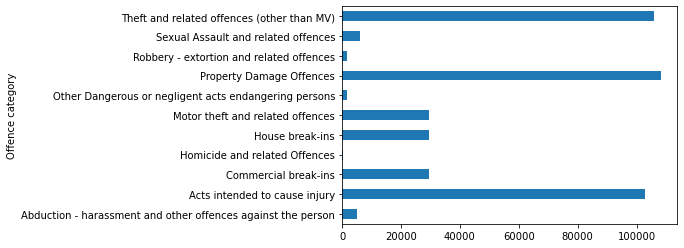

In [70]:
nt_df.groupby('Offence category')['Number of offences'].sum().plot(kind = 'barh')

<AxesSubplot:ylabel='Offence category'>

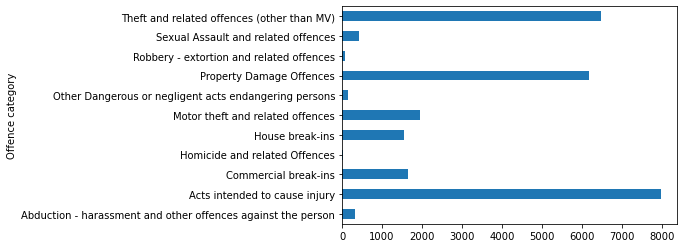

In [71]:
nt_df[nt_df['Year'] == 2013].groupby('Offence category')['Number of offences'].sum().plot(kind = 'barh')

In [72]:
nt_df.groupby('Offence category')['Number of offences'].sum()

Offence category
Abduction - harassment and other offences against the person      5027
Acts intended to cause injury                                   102739
Commercial break-ins                                             29600
Homicide and related Offences                                      248
House break-ins                                                  29496
Motor theft and related offences                                 29486
Other Dangerous or negligent acts endangering persons             1787
Property Damage Offences                                        108292
Robbery - extortion and related offences                          1809
Sexual Assault and related offences                               6248
Theft and related offences (other than MV)                      105809
Name: Number of offences, dtype: int64

<h1 style='color:blue'> Which region has the highest number of offences? </h1> 
<p style='color:blue'> The pie chart below shows that majority of the cases reported occurred in NT Balance.</p>

<p style='color: red'> There were 28,878 cases out of the total cases that were left blank. It can be assumed here that the alcohol involvement was unknown. Replace all - with Alcohol involvement unknown</p>

In [73]:
nt_df.groupby('Alcohol involvement')['Number of offences'].sum()

Alcohol involvement
-                              318173
Alcohol involved                56349
Alcohol involvement unknown     19642
No alcohol involved             26377
Name: Number of offences, dtype: int64

<p style='color: red'> There were 28,878 cases out of the total cases that were left blank. It can be assumed here that the domestic violence involvement was unknown. Replace all - with Domestic violence involvement unknown</p>

In [59]:
nt_df.groupby('DV involvement')['Number of offences'].sum()

DV involvement
-         318173
DV         59546
Non-DV     42822
Name: Number of offences, dtype: int64